In [43]:
import numpy as np
import pandas as pd
from PIL import Image
import requests
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from urllib.error import HTTPError, URLError
from PIL import UnidentifiedImageError

In [2]:
books=pd.read_csv('Books.csv')
ratings=pd.read_csv('Ratings.csv')
users=pd.read_csv('Users.csv')

C:\Users\Alina\AppData\Local\Temp\ipykernel_20920\775865190.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('Books.csv')


In [3]:
books.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
48325,0486242056,Victorian and Edwardian Fashion: A Photographi...,Alison Gernsheim,1981,Dover Publications,http://images.amazon.com/images/P/0486242056.0...,http://images.amazon.com/images/P/0486242056.0...,http://images.amazon.com/images/P/0486242056.0...
154912,002864459X,The Pocket Idiot's Guide to Buddhism,Bradley K. Hawkins,2002,Alpha Books,http://images.amazon.com/images/P/002864459X.0...,http://images.amazon.com/images/P/002864459X.0...,http://images.amazon.com/images/P/002864459X.0...
187239,0394488326,Return to earth,Edwin E Aldrin,1973,Random House,http://images.amazon.com/images/P/0394488326.0...,http://images.amazon.com/images/P/0394488326.0...,http://images.amazon.com/images/P/0394488326.0...
190715,0786915641,Dragons of a Fallen Sun (Dragonlance: The War ...,Margaret Weis,2000,Wizards of the Coast,http://images.amazon.com/images/P/0786915641.0...,http://images.amazon.com/images/P/0786915641.0...,http://images.amazon.com/images/P/0786915641.0...
159391,0768320607,To Take Away the Hurt: Insights into Healing,Flavia Weedn,1999,Cedco Publishing Company,http://images.amazon.com/images/P/0768320607.0...,http://images.amazon.com/images/P/0768320607.0...,http://images.amazon.com/images/P/0768320607.0...


In [4]:
ratings.sample(5)

,User-ID,ISBN,Book-Rating
992514,238557,0345426037,8
440048,105374,0312261810,0
40779,10314,0312278306,9
269247,62558,0451162897,0
861091,208347,0375502548,0


In [5]:
users.sample(5)

,User-ID,Location,Age
198724,198725,"wilson, wisconsin, usa",45.0
31625,31626,"iowa city, iowa, iowa, usa",62.0
215136,215137,"woodstock, georgia, usa",39.0
11814,11815,"charlotte, north carolina, usa",14.0
270210,270211,"university city, missouri, usa",33.0


In [6]:
print('The shape of books dataset',books.shape)
print('The shape of ratings dataset',ratings.shape)
print('The shape of users dataset',users.shape)

The shape of books dataset (271360, 8)
The shape of ratings dataset (1149780, 3)
The shape of users dataset (278858, 3)


In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
#check for duplicate values
ratings.duplicated().sum()

0

In [11]:
users.duplicated().sum()

0

In [12]:
books.duplicated().sum()

0

In [13]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [14]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
books_df=books.merge(ratings, on='ISBN')

In [16]:
books_df.shape

(1031136, 10)

In [17]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [18]:
books_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            4
User-ID                0
Book-Rating            0
dtype: int64

In [19]:
rating_counts=books_df.groupby('Book-Title').count()['Book-Rating'].reset_index()
rating_counts.rename(columns={'Book-Rating':'Number_Of_Times_Rated'},inplace=True)
rating_counts

,Book-Title,Number_Of_Times_Rated
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [20]:
avg_rating=books_df.groupby('Book-Title').mean()['Book-Rating'].reset_index()



In [21]:
avg_rating.rename(columns={'Book-Rating':'Avg_Rating'},inplace=True)
avg_rating

,Book-Title,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [22]:
avg_rating.sort_values('Avg_Rating',ascending=True)

,Book-Title,Avg_Rating
200246,The Not-So-Great Escape (McGee and Me! #03 Book),0.0
200260,The Notebooks of Leonardo Da Vinci (Volume 2),0.0
200264,The Nothing,0.0
200265,The Nothing Man,0.0
200266,The Nothing That Is: A Natural History of Zero,0.0
...,...,...
107395,Lewis and Clark: Voyage of Discovery (Voyage o...,10.0
63347,FAR/AIM 2003: Federal Aviation Regulations/Aer...,10.0
231761,What Followers Expect from Leaders : How to Me...,10.0
63348,FAR/AIM 2004: Federal Aviation Regulations/Aer...,10.0


C:\Users\Alina\AppData\Local\Temp\ipykernel_20920\600826393.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


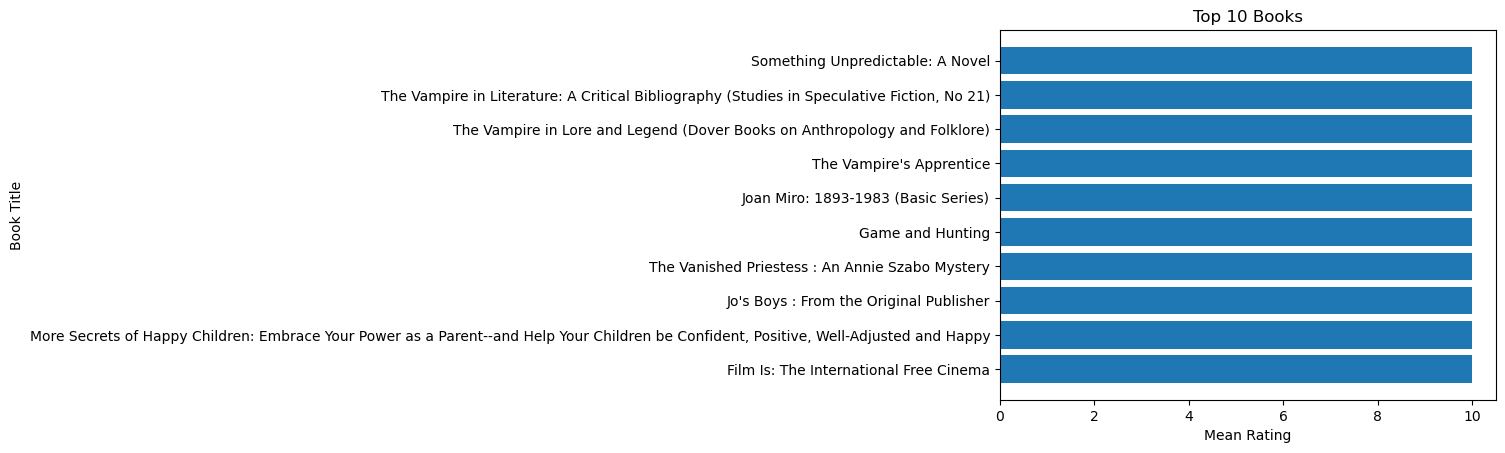

In [23]:
top_10_books = books_df.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)

# Plotting the top 10 books
plt.barh(top_10_books.index, top_10_books.values)
plt.xlabel('Mean Rating')
plt.ylabel('Book Title')
plt.title('Top 10 Books')
plt.tight_layout()
plt.show()

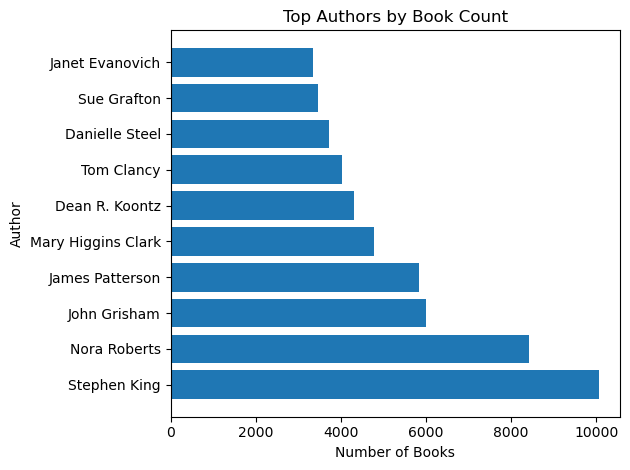

In [36]:
# Grouping data by author and counting the number of books
top_authors = books_df['Book-Author'].value_counts().head(10)

# Plotting the top authors
plt.barh(top_authors.index, top_authors.values)
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.title('Top Authors by Book Count')
plt.tight_layout()
plt.show()

In [24]:
rating_counts[rating_counts['Book-Title']=='The Not-So-Great Escape (McGee and Me! #03 Book)']

,Book-Title,Number_Of_Times_Rated
200246,The Not-So-Great Escape (McGee and Me! #03 Book),2


In [25]:
popular_books=rating_counts.merge(avg_rating,on='Book-Title')
popular_books.sample(5)

,Book-Title,Number_Of_Times_Rated,Avg_Rating
240235,Zack's Alligator (An I Can Read Book),7,4.428571
138736,Pears on a Willow Tree,5,3.400000
219337,Timeless Love (By Request 2'S) (By Request 2's),6,1.666667
2660,A Crafter's Book Of Santas: More Than 50 Festi...,1,8.000000
32634,"Catspeak: How to Learn It, Speak It, and Use I...",1,0.000000


In [26]:
popular_books=popular_books[popular_books['Number_Of_Times_Rated']>=300].sort_values('Avg_Rating',ascending=False).head(50)

In [27]:
popular_books= popular_books.merge(books,on='Book-Title')

In [28]:
popular_books.shape

(173, 10)

In [29]:
popular_books.duplicated('Book-Title').sum()

123

In [30]:
popular_books=popular_books.drop_duplicates('Book-Title')
popular_books.shape

(50, 10)

In [31]:
popular_books.head()

,Book-Title,Number_Of_Times_Rated,Avg_Rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
12,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...


In [32]:
popular_books.drop(columns=['Year-Of-Publication','Publisher','Image-URL-S','Image-URL-L'],inplace=True)
popular_books

,Book-Title,Number_Of_Times_Rated,Avg_Rating,ISBN,Book-Author,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...
9,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...
12,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...
21,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...
23,To Kill a Mockingbird,510,4.700000,0446310786,Harper Lee,http://images.amazon.com/images/P/0446310786.0...
31,The Da Vinci Code,898,4.642539,0385504209,Dan Brown,http://images.amazon.com/images/P/0385504209.0...
37,The Five People You Meet in Heaven,430,4.551163,0786868716,Mitch Albom,http://images.amazon.com/images/P/0786868716.0...
39,The Catcher in the Rye,449,4.545657,0316769487,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...


In [33]:
popular_books=popular_books.reset_index()

# Collaborative Based Filtering recommneder system

In [ ]:
books_df

In [53]:
x=books_df.groupby('User-ID').count()['Book-Rating'] > 200
highest_users=x[x].index

In [56]:
filtered_rating= books_df[books_df['User-ID'].isin(highest_users)]
filtered_rating

In [61]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index


In [64]:
final_ratings=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [65]:
final_ratings.drop_duplicates()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0
...,...,...,...,...,...,...,...,...,...,...
1028414,1878702831,Echoes,Nancy Morse,1992,Meteor Publishing Corporation,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,http://images.amazon.com/images/P/1878702831.0...,238781,0
1028600,0394429869,I Know Why the Caged Bird Sings,Maya Angelou,1996,Random House,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,http://images.amazon.com/images/P/0394429869.0...,239594,8
1028602,0449001164,The Promise,CHAIM POTOK,1997,Ballantine Books,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,http://images.amazon.com/images/P/0449001164.0...,239594,7
1028815,0743527631,The Pillars of the Earth,Ken Follett,2002,Encore,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,http://images.amazon.com/images/P/0743527631.0...,240144,0


In [67]:
pt=final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [68]:
pt =pt.fillna(0)

In [69]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.metrics.pairwise import cosine_similarity

In [89]:
similarity_scores=cosine_similarity(pt)

In [90]:
similarity_scores[701]

array([0.05864096, 0.05235293, 0.06854926, 0.10863774, 0.        ,
       0.06491944, 0.        , 0.13143418, 0.12624466, 0.07239722,
       0.        , 0.23992871, 0.05484953, 0.05490771, 0.03497254,
       0.05750916, 0.        , 0.15955593, 0.        , 0.09342887,
       0.        , 0.0958486 , 0.04198053, 0.        , 0.        ,
       0.11454787, 0.06068938, 0.05071831, 0.06912569, 0.08366066,
       0.10915929, 0.08724293, 0.        , 0.04748948, 0.05668266,
       0.        , 0.        , 0.0419847 , 0.        , 0.        ,
       0.        , 0.07257332, 0.03186642, 0.07167125, 0.10357381,
       0.05331118, 0.10714551, 0.04470636, 0.        , 0.        ,
       0.08714097, 0.        , 0.        , 0.04899945, 0.09668956,
       0.08315595, 0.03779463, 0.13079186, 0.05923464, 0.14205798,
       0.09620313, 0.        , 0.        , 0.        , 0.13610051,
       0.04923976, 0.07213736, 0.0468452 , 0.12316475, 0.0451548 ,
       0.        , 0.        , 0.        , 0.11426745, 0.03644

In [122]:
def recommend(book_name):
    index=np.where(pt.index==book_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_scores[index])), key=lambda x:x[1],reverse=True)[1:6]
    
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [123]:
recommend("I'll Be Seeing You")

[['You Belong To Me',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671004549.01.MZZZZZZZ.jpg'],
 ['Let Me Call You Sweetheart',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671568175.01.MZZZZZZZ.jpg'],
 ["Daddy's Little Girl",
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0743206045.01.MZZZZZZZ.jpg'],
 ['Before I Say Good-Bye',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671004573.01.MZZZZZZZ.jpg'],
 ['On the Street Where You Live',
  'Mary Higgins Clark',
  'http://images.amazon.com/images/P/0671004530.01.MZZZZZZZ.jpg']]

In [121]:
import pickle

pickle.dump(popular_books,open('popular.pkl','wb'))


In [124]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))